In [1]:
import warnings
warnings.simplefilter("ignore")
#importing the necessary packages
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

2023-12-07 22:55:18.376033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:55:18.376067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:55:18.377119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:55:18.382320: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 22:55:18.952404: W tensorflow/compiler/tf2

In [7]:
dataset = pandas.read_csv('data/sp500.csv')
dataset

,1455.219971
0,1399.420044
1,1402.109985
2,1403.449951
3,1441.469971
4,1457.599976
...,...
4165,2169.179932
4166,2166.580078
4167,2170.060059
4168,2173.600098


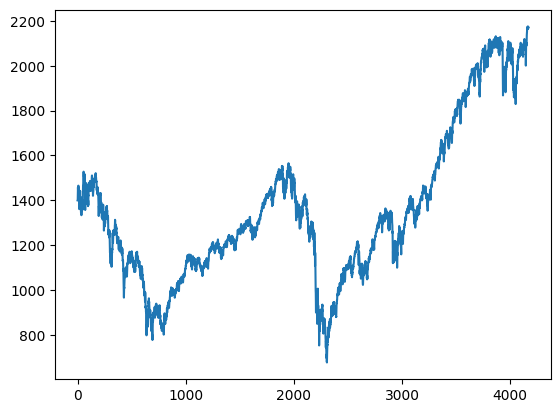

In [8]:
plt.plot(dataset)
plt.show()

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
from sklearn.model_selection import train_test_split
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test))
train, test = train_test_split(dataset, test_size=0.33, random_state=42)  # You can set a random seed for reproducibility
print(len(train), len(test))

2793 1377


In [13]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99668337]
 [0.99904576]
 [0.99720391]]


In [14]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
trainX.shape

(2791, 1)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

2023-12-07 23:02:25.898884: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-07 23:02:25.936292: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-07 23:02:25.936516: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/100


2023-12-07 23:02:27.122289: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-07 23:02:27.433897: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdf2814c0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-07 23:02:27.433974: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-12-07 23:02:27.447270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701986547.550172   24215 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


280/280 - 2s - loss: 0.1709 - 2s/epoch - 8ms/step
Epoch 2/100
280/280 - 1s - loss: 0.0607 - 653ms/epoch - 2ms/step
Epoch 3/100
280/280 - 1s - loss: 0.0522 - 614ms/epoch - 2ms/step
Epoch 4/100
280/280 - 1s - loss: 0.0523 - 588ms/epoch - 2ms/step
Epoch 5/100
280/280 - 1s - loss: 0.0522 - 789ms/epoch - 3ms/step
Epoch 6/100
280/280 - 1s - loss: 0.0523 - 784ms/epoch - 3ms/step
Epoch 7/100
280/280 - 1s - loss: 0.0523 - 767ms/epoch - 3ms/step
Epoch 8/100
280/280 - 1s - loss: 0.0522 - 704ms/epoch - 3ms/step
Epoch 9/100
280/280 - 1s - loss: 0.0523 - 841ms/epoch - 3ms/step
Epoch 10/100
280/280 - 1s - loss: 0.0523 - 791ms/epoch - 3ms/step
Epoch 11/100
280/280 - 1s - loss: 0.0522 - 558ms/epoch - 2ms/step
Epoch 12/100
280/280 - 1s - loss: 0.0523 - 750ms/epoch - 3ms/step
Epoch 13/100
280/280 - 1s - loss: 0.0522 - 816ms/epoch - 3ms/step
Epoch 14/100
280/280 - 1s - loss: 0.0523 - 664ms/epoch - 2ms/step
Epoch 15/100
280/280 - 1s - loss: 0.0522 - 555ms/epoch - 2ms/step
Epoch 16/100
280/280 - 1s - loss: 

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

43/43 [==============================] - 0s 774us/step
Train Score: 342.33 RMSE
Test Score: 343.08 RMSE


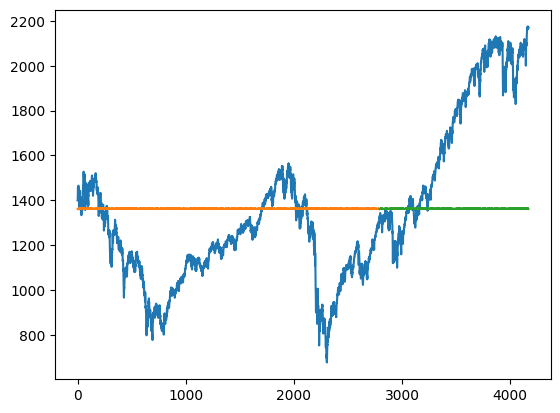

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()